## Packages and models

In [65]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from fft_conv_pytorch import FFTConv1d, FFTConv2d, FFTConv3d
from models.LeNet import LeNet
from models.AlexNet import AlexNet
from models.GoogLeNet import GoogLeNet
from models.LKSNet import LKSNet

## Test of inference speed of Fast Fourier Transform Convolution for dimension 1, 2 and 3 for different kernel sizes



In [45]:
def benchmark_1d():
    input_data = torch.randn(1, 3, 4096)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 500, 10):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv1d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv1d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [46]:
benchmark = benchmark_1d()

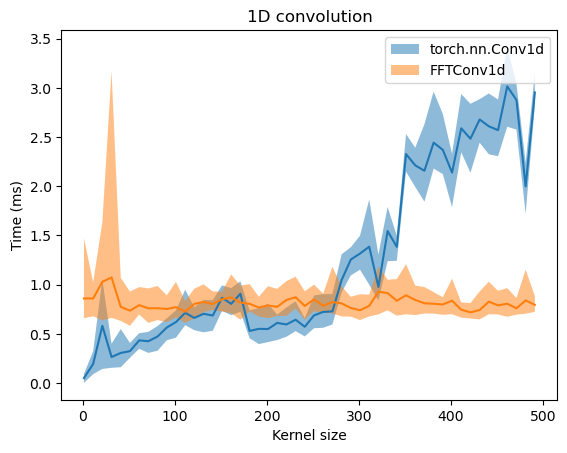

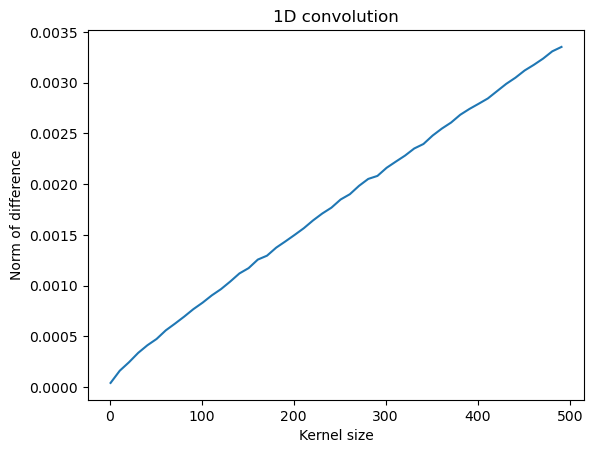

In [47]:
plt.figure()
plt.fill_between(range(1, 500, 10), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv1d')
plt.plot(range(1, 500, 10), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 500, 10), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv1d')
plt.plot(range(1, 500, 10), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('1D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 500, 10), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('1D convolution')
plt.show()

In [2]:
def benchmark_2d():
    input_data = torch.randn(1, 3, 512, 512)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 50, 5):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv2d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv2d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [5]:
benchmark = benchmark_2d()

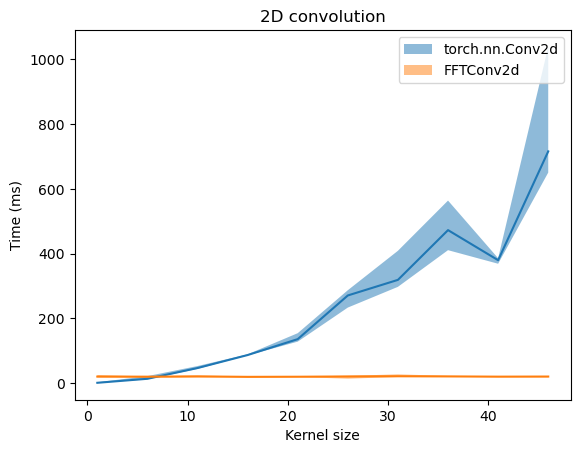

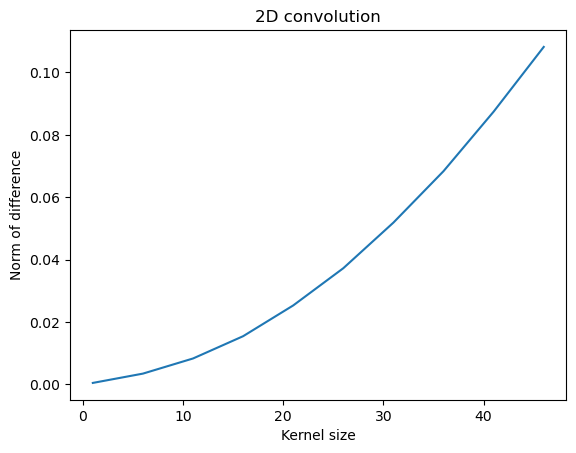

In [6]:
plt.figure()
plt.fill_between(range(1, 50, 5), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv2d')
plt.plot(range(1, 50, 5), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 50, 5), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv2d')
plt.plot(range(1, 50, 5), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('2D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 50, 5), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('2D convolution')
plt.show()

In [58]:
def benchmark_3d():
    input_data = torch.randn(1, 3, 64, 64, 64)
    times_with_fourier = []
    times_without_fourier = []
    list_norms = []
    
    for kernel in range(1, 10, 1):
        sublist_with_fourier = []
        sublist_without_fourier = []
        sublist_norm = []
        
        for _ in range(10):
            conv_fourier = FFTConv3d(3, 4, kernel, stride=1, padding=0)
            kernel_weight = conv_fourier.weight
            kernel_bias = conv_fourier.bias
            
            conv = torch.nn.Conv3d(3, 4, kernel, stride=1, padding=0)
            conv.weight = torch.nn.Parameter(kernel_weight)
            conv.bias = torch.nn.Parameter(kernel_bias)
            
            torch.mps.synchronize()
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output_fourier = conv_fourier(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_with_fourier.append(t0.elapsed_time(t1))
            
            t0 = torch.mps.Event(enable_timing=True)
            t1 = torch.mps.Event(enable_timing=True)
            
            t0.record()
            output = conv(input_data)
            t1.record()
            torch.mps.synchronize()
            
            sublist_without_fourier.append(t0.elapsed_time(t1))
            sublist_norm.append(torch.norm(output - output_fourier))
        
        times_with_fourier.append(sublist_with_fourier)
        times_without_fourier.append(sublist_without_fourier)
        list_norms.append(torch.mean(torch.tensor(sublist_norm)))
    
    return times_without_fourier, times_with_fourier, list_norms

In [59]:
benchmark = benchmark_3d()

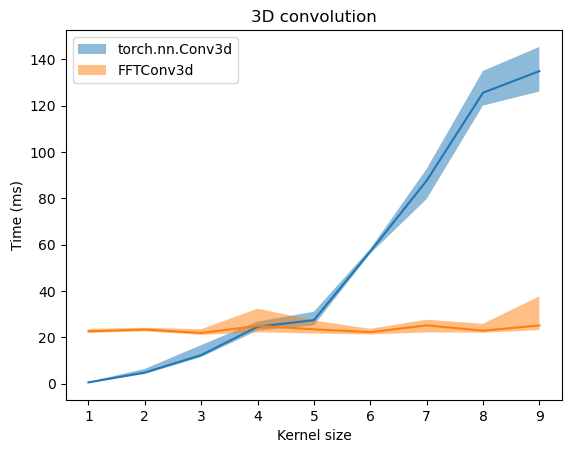

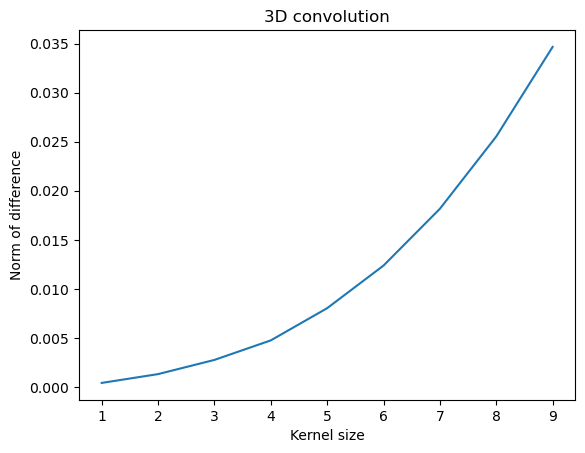

In [60]:
plt.figure()
plt.fill_between(range(1, 10, 1), [min(x) for x in benchmark[0]], [max(x) for x in benchmark[0]], alpha=0.5, label='torch.nn.Conv3d')
plt.plot(range(1, 10, 1), [sum(x)/len(x) for x in benchmark[0]])
plt.fill_between(range(1, 10, 1), [min(x) for x in benchmark[1]], [max(x) for x in benchmark[1]], alpha=0.5, label='FFTConv3d')
plt.plot(range(1, 10, 1), [sum(x)/len(x) for x in benchmark[1]])
plt.xlabel('Kernel size')
plt.ylabel('Time (ms)')
plt.title('3D convolution')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 10, 1), benchmark[2])
plt.xlabel('Kernel size')
plt.ylabel('Norm of difference')
plt.title('3D convolution')
plt.show()

## Comparison of inference speed for different basic models 

In [3]:
models = [LeNet, AlexNet, GoogLeNet, LKSNet]
bools = [False, True]

benchmark = {'models':['LeNet', 'AlexNet', 'GoogLeNet', 'LKSNet'],
             'FFC':[],
             'no FFC':[]}

for model in models:
    for is_fourier in bools:
        if model == LeNet:
            x = torch.randn(10, 1, 28, 28)
        else:
            x = torch.randn(10, 3, 227, 227)
        net = model(fourier=is_fourier)
        torch.mps.synchronize()
        t0 = torch.mps.Event(enable_timing=True)
        t1 = torch.mps.Event(enable_timing=True)
        t0.record()
        out = net(x)
        t1.record()
        torch.mps.synchronize()
        if is_fourier:
            benchmark['FFC'].append(t0.elapsed_time(t1))
        else:
            benchmark['no FFC'].append(t0.elapsed_time(t1))

benchmark = pd.DataFrame(benchmark)
benchmark.index = benchmark['models']
benchmark.drop(columns=['models'], inplace=True)

title = "Time of Forward Passes for differents architectures with and without FFC"
print(title)
benchmark

Time of Forward Passes for differents architectures with and without FFC


,FFC,no FFC
models,,
LeNet,5.768583,9.270792
AlexNet,733.923166,52.916125
GoogLeNet,1502.175667,213.153583
LKSNet,127.533625,5393.891459


## Effect of the number of channels on inference speed for LKSNet

In [20]:
KERNEL_SIZES = [39, 27, 15]
STRIDES = [1, 1, 1]
PADDINGS = [0, 0, 0]

benchmark = {'CHANNELS':[],
             'FFC':[],
             'no FFC':[]}

is_fourier = [True, False]

x = torch.randn(1, 3, 224, 224)

channels_0 = [3, 9, 15]
channels_1 = [6, 12, 18]
channels_2 = [12, 18, 24]
channels_3 = [18, 24, 30]
channels_4 = [24, 30, 36]
list_channels = [channels_0, channels_1, channels_2, channels_3, channels_4]

for channels in list_channels:
    benchmark['CHANNELS'].append(channels)
    for fourier in is_fourier:
        model = LKSNet(fourier=fourier, kernel_sizes=KERNEL_SIZES, strides=STRIDES, paddings=PADDINGS, channels=channels)
        torch.mps.synchronize()
        t0 = torch.mps.Event(enable_timing=True)
        t1 = torch.mps.Event(enable_timing=True)
        t0.record()
        out = model(x)
        t1.record()
        torch.mps.synchronize()
        if fourier:
            benchmark['FFC'].append(t0.elapsed_time(t1))
        else:
            benchmark['no FFC'].append(t0.elapsed_time(t1))

benchmark = pd.DataFrame(benchmark)
benchmark.index = benchmark['CHANNELS']
benchmark.drop(columns=['CHANNELS'], inplace=True)

title = "Time of Forward Passes for differents channels with and without FFC"
print(title)
benchmark

Time of Forward Passes for differents channels with and without FFC


,FFC,no FFC
CHANNELS,,
"[3, 9, 15]",53.980459,132.282750
"[6, 12, 18]",48.752917,152.618750
"[12, 18, 24]",286.148875,214.773208
"[18, 24, 30]",627.531917,282.559041
"[24, 30, 36]",760.334916,342.010792


## Effect of the number of channels on inference speed on a colored image 224x224

In [12]:
def compute_time(function):
    torch.mps.synchronize()
    t0 = torch.mps.Event(enable_timing=True)
    t1 = torch.mps.Event(enable_timing=True)
    t0.record()
    function()
    t1.record()
    torch.mps.synchronize()
    return t0.elapsed_time(t1)

In [68]:
x = torch.randn(1, 3, 224, 224)

in_channels = 3
out_channels = torch.arange(1, 200, 5)
kernel_sizes = torch.arange(1, 40, 2)
stride = 1
padding = 0

In [69]:
res_basic = []
res_ffc = []

for kernel_size in kernel_sizes:
    for out_channel in out_channels:

        conv_basic = torch.nn.Conv2d(in_channels, out_channel.item(), kernel_size.item(), stride=stride, padding=padding)
        subres_basic = [kernel_size.item(), out_channel.item(), compute_time(lambda: conv_basic(x))]
        res_basic.append(subres_basic)

        conv_ffc = FFTConv2d(in_channels, out_channel.item(), kernel_size.item(), stride=stride, padding=padding)
        conv_ffc.weight = conv_basic.weight
        conv_ffc.bias = conv_basic.bias
        subres_ffc = [kernel_size.item(), out_channel.item(), compute_time(lambda: conv_ffc(x))]
        res_ffc.append(subres_ffc)

In [70]:
res_basic = pd.DataFrame(res_basic, columns=['kernel_size', 'out_channel', 'time'])
res_ffc = pd.DataFrame(res_ffc, columns=['kernel_size', 'out_channel', 'time'])

Text(0.95, 0.9, 'FFT Convolution')

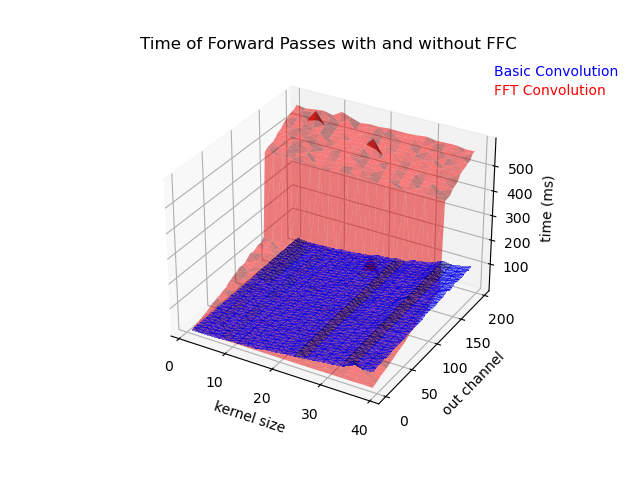

In [105]:
%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, nrows=1, ncols=1)

ax.plot_trisurf(res_basic['kernel_size'], res_basic['out_channel'], res_basic['time'], linewidth=0, antialiased=False, color='blue', alpha=0.5)

ax.set_xlabel('kernel size')
ax.set_ylabel('out channel')
ax.set_zlabel('time (ms)')

ax.plot_trisurf(res_ffc['kernel_size'], res_ffc['out_channel'], res_ffc['time'], color='red', alpha=0.5)

ax.title.set_text('Time of Forward Passes with and without FFC')

ax.text2D(0.95, 0.95, "Basic Convolution", transform=ax.transAxes, color='blue')
ax.text2D(0.95, 0.90, "FFT Convolution", transform=ax.transAxes, color='red')